In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.font_manager as fm
# 한글 폰트 설정
plt.rcParams['font.family'] = 'HYGothic-Extra'


In [ ]:
# 1. 데이터 잔처리 및 저장
df = pd.read_csv("한국도로교통공단_가해운전자 연령층별 월별 교통사고 통계_20241231.csv", encoding='cp949')

a = df.values.tolist()
a = np.array(a)

print(a[0])  # 0행 데이터 확인
print(a[1])  # 1행 데이터 확인
print(a[2])  # 2행 데이터 확인

X = a[:, [3, 7]]  # 3열(사망자 수), 7열(부상자 수) 입력
y = a[:, 2] # 2열(사고건 수) 입력
# 데이터 타입을 정수형으로 변환
X = X.astype(int)
y = y.astype(int)
# 데이터 확인
print(X[0])
print(y[0])


['20세이하' '1' '256' '2' '68' '244' '38' '350']
['20세이하' '2' '269' '1' '64' '282' '35' '381']
['20세이하' '3' '403' '4' '120' '361' '85' '566']
[  2 350]
256


In [71]:
# 2. 모델 학습
model = LinearRegression()
model.fit(X, y)

# 3. 예측 데이터 생성 및 예측
new_data = np.array([[30, 3000]])
predicted_score = model.predict(new_data)


# 4. 시각화용 평면 데이터 생성
x1_range = np.linspace(0, 70, 71)  # 임의로 0부터 70까지 71개의 간격으로 나눠진 넘파이 배열 생성
print("구해진 회기식에 넣어 평면을 그릴 x1 값들(임의로 넣은 것) \n", x1_range)

x2_range = np.linspace(0, 6000, 6001) # 임의로 0부터 6000까지 6001개의 간격으로 나눠진 넘파이 배열 생성
print("구해진 회기식에 넣어 평면을 그릴 x2 값들(임의로 넣은 것) \n", x2_range)

# 위의 두 1차원 배열을 이용해 2차원 그리드 데이터 생성
x1_grid, x2_grid = np.meshgrid(x1_range, x2_range)
print("\n(2차원으로 표현된) 회기식에 넣을 x1값들 \n", x1_grid)   
print("(2차원으로 표현된) 회기식에 넣을 x2값들 \n", x2_grid)  

# 위의 모든 입력값 x1_grid, x2_grid 조합을 이용해 회기식의 출력값 y 계산
y_grid = model.coef_[0] * x1_grid + model.coef_[1] * x2_grid + model.intercept_
print("\n위 두 행렬의 각 위치(인덱스)의 x1, x2 입력을 이용해 y값을 계산한 결과")
print("(각 인덱스 위치의 값을 입력 0, 0   1, 0   2, 0   ... )해서 출력 계산")
print("즉, 모든 입력 조합에 대한 출력 계산\n")
print(y_grid)

구해진 회기식에 넣어 평면을 그릴 x1 값들(임의로 넣은 것) 
 [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70.]
구해진 회기식에 넣어 평면을 그릴 x2 값들(임의로 넣은 것) 
 [0.000e+00 1.000e+00 2.000e+00 ... 5.998e+03 5.999e+03 6.000e+03]

(2차원으로 표현된) 회기식에 넣을 x1값들 
 [[ 0.  1.  2. ... 68. 69. 70.]
 [ 0.  1.  2. ... 68. 69. 70.]
 [ 0.  1.  2. ... 68. 69. 70.]
 ...
 [ 0.  1.  2. ... 68. 69. 70.]
 [ 0.  1.  2. ... 68. 69. 70.]
 [ 0.  1.  2. ... 68. 69. 70.]]
(2차원으로 표현된) 회기식에 넣을 x2값들 
 [[0.000e+00 0.000e+00 0.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [2.000e+00 2.000e+00 2.000e+00 ... 2.000e+00 2.000e+00 2.000e+00]
 ...
 [5.998e+03 5.998e+03 5.998e+03 ... 5.998e+03 5.998e+03 5.998e+03]
 [5.999e+03 5.999e+03 5.999e+03 ... 5.999e+03 5.999

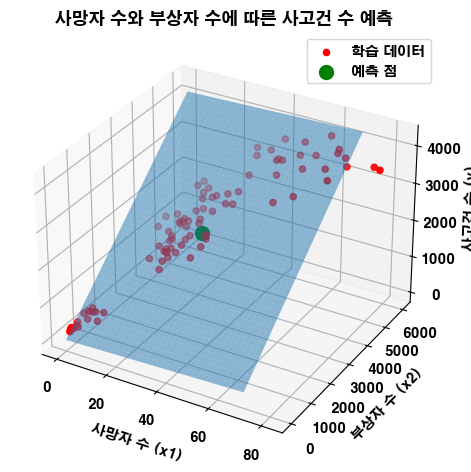

In [73]:
# 5. 시각화
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 입력 데이터 시각화
ax.scatter(X[:, 0], X[:, 1], y, color='red', label='학습 데이터')

# 예측 데이터 시각화
ax.scatter(new_data[:, 0], new_data[:, 1], predicted_score, color='green', s=100, label='예측 점')

# 회귀 평면, 위의 x1_grid, x2_grid, y_grid를 이용해 평면 그리기
ax.plot_surface(x1_grid, x2_grid, y_grid, alpha=0.5)

# 라벨과 제목 (한글)
ax.set_xlabel('사망자 수 (x1)')
ax.set_ylabel('부상자 수 (x2)')
ax.set_zlabel('사고건 수 (y)')
ax.set_title('사망자 수와 부상자 수에 따른 사고건 수 예측')

# 범례 및 레이아웃
ax.legend()
plt.tight_layout()
plt.show()